In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler, LabelEncoder

<h1 style="color:#cd6ae8"> 
Import and scale new data for EDA
</h1>

In [2]:
# read the data and show 
data_old = pd.read_csv('./bs140513_032310.csv', sep=',',)
data_old.head(10)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
5,0,'C1315400589','3','F','28007','M348934600','28007','es_transportation',25.81,0
6,0,'C765155274','1','F','28007','M348934600','28007','es_transportation',9.10,0
7,0,'C202531238','4','F','28007','M348934600','28007','es_transportation',21.17,0
8,0,'C105845174','3','M','28007','M348934600','28007','es_transportation',32.40,0
9,0,'C39858251','5','F','28007','M348934600','28007','es_transportation',35.40,0


In [3]:
# Drop fraud column assgin to X varaible
# Assgin fraud column to y variable
# Preparing for reduce volumn of data
X = data_old.drop(columns=['fraud'], axis=1)
y = data_old['fraud']

In [4]:
# split train test and stratify with y variable to get sample data for EDA
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [5]:
# concat 2 of these for EDA
data = X_test
data['fraud'] = y_test
data.head()

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
173529,60,'C956794113','3','F','28007','M1823072687','28007','es_transportation',42.42,0
141579,50,'C1991820533','5','M','28007','M1823072687','28007','es_transportation',26.25,0
560715,170,'C1911281701','2','M','28007','M1823072687','28007','es_transportation',59.65,0
121655,43,'C798657650','3','M','28007','M348934600','28007','es_transportation',38.53,0
326969,106,'C956414645','2','F','28007','M1823072687','28007','es_transportation',11.68,0


In [6]:
# Drop unused columns
dataIsolation = data
dataKNN = data
data = data.drop(['fraud','customer','zipcodeOri','zipMerchant'],axis=1)
data.head()

,step,age,gender,merchant,category,amount
173529,60,'3','F','M1823072687','es_transportation',42.42
141579,50,'5','M','M1823072687','es_transportation',26.25
560715,170,'2','M','M1823072687','es_transportation',59.65
121655,43,'3','M','M348934600','es_transportation',38.53
326969,106,'2','F','M1823072687','es_transportation',11.68


<h1 style="color:#51c791"> 
EDA Process
</h1>

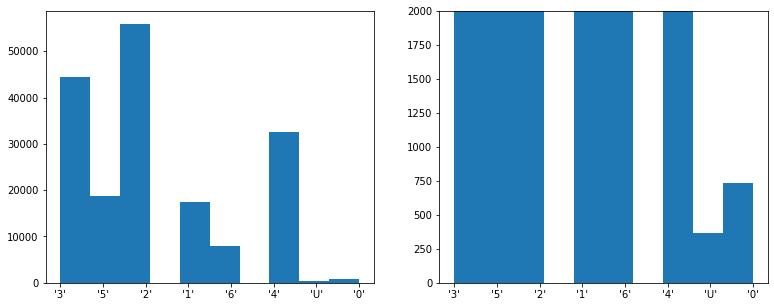

In [7]:
# Age chart
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(data['age'])

plt.subplot(132)
plt.ylim(top=2000)
plt.hist(data['age'])

plt.show()

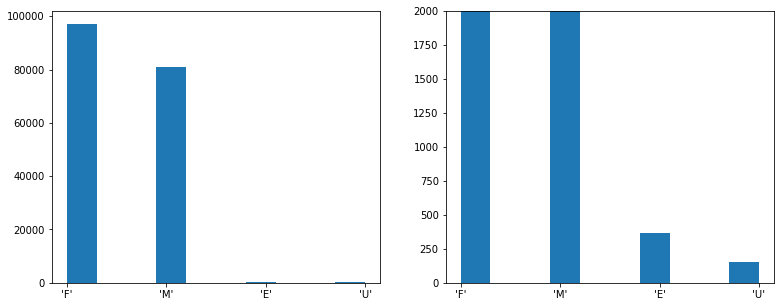

In [8]:
# Gender chart
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(data['gender'])

plt.subplot(132)
plt.ylim(top=2000)
plt.hist(data['gender'])

plt.show()

(array([14082., 15502., 16495., 17290., 17996., 18574., 19198., 19525.,
        19724., 20007.]),
 array([  0. ,  17.9,  35.8,  53.7,  71.6,  89.5, 107.4, 125.3, 143.2,
        161.1, 179. ]),
 <a list of 10 Patch objects>)

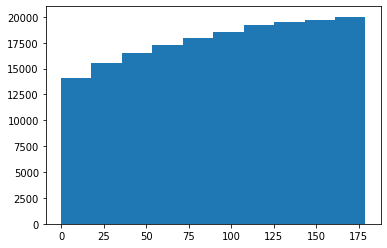

In [9]:
# Step chart
plt.hist(data['step'])

(array([1.61185e+05, 5.14900e+03, 4.92400e+03, 3.19800e+03, 8.54000e+02,
        7.54000e+02, 9.97000e+02, 7.41000e+02, 4.93000e+02, 9.80000e+01]),
 array([ 0. ,  4.9,  9.8, 14.7, 19.6, 24.5, 29.4, 34.3, 39.2, 44.1, 49. ]),
 <a list of 10 Patch objects>)

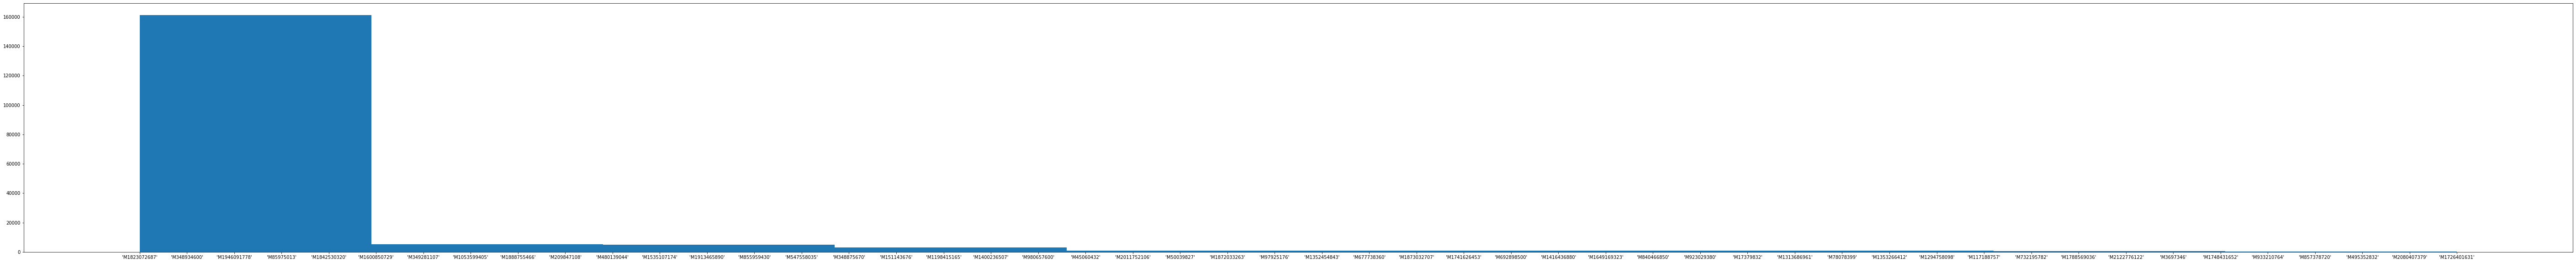

In [10]:
# Merchant chart
plt.figure(figsize=(100,10))
plt.hist(data['merchant'])

In [11]:
data['merchant'].value_counts()

'M1823072687'    89879
'M348934600'     61604
'M85975013'       7800
'M1053599405'     2059
'M151143676'      1923
'M855959430'      1808
'M1946091778'     1664
'M1913465890'     1219
'M209847108'      1167
'M480139044'      1075
'M349281107'       907
'M1600850729'      756
'M1535107174'      547
'M980657600'       538
'M78078399'        493
'M1198415165'      463
'M840466850'       381
'M1649169323'      357
'M692898500'       277
'M50039827'        275
'M547558035'       275
'M1888755466'      260
'M1400236507'      243
'M1842530320'      238
'M45060432'        182
'M732195782'       169
'M97925176'        168
'M1741626453'      164
'M1313686961'      163
'M1872033263'      155
'M1352454843'      117
'M677738360'       106
'M923029380'        97
'M2122776122'       92
'M3697346'          91
'M17379832'         90
'M1873032707'       90
'M1748431652'       87
'M2011752106'       74
'M1416436880'       72
'M1294758098'       56
'M1788569036'       54
'M857378720'        46
'M348875670

<h1 style="color:#ff8080"> 
Encode the data with LabelEncoder
</h1>

In [12]:
category = ['age','gender','merchant','category']
for column in category:
        if column in data.columns.values:
            data[column] = LabelEncoder().fit_transform(data[column])
        if column in dataIsolation.columns.values:
            dataIsolation[column] = LabelEncoder().fit_transform(dataIsolation[column])
        if column in dataKNN.columns.values:
            dataKNN[column] = LabelEncoder().fit_transform(dataKNN[column])
data.head()

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,step,age,gender,merchant,category,amount
173529,60,3,1,18,12,42.42
141579,50,5,2,18,12,26.25
560715,170,2,2,18,12,59.65
121655,43,3,2,30,12,38.53
326969,106,2,1,18,12,11.68


In [13]:
# check missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178393 entries, 173529 to 160650
Data columns (total 6 columns):
step        178393 non-null int64
age         178393 non-null int32
gender      178393 non-null int32
merchant    178393 non-null int32
category    178393 non-null int32
amount      178393 non-null float64
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.8 MB


In [14]:
#check unique value in age
data.age.unique()

array([3, 5, 2, 1, 6, 4, 7, 0], dtype=int64)

In [15]:
#check unique value in gendar
data.gender.unique()

array([1, 2, 0, 3], dtype=int64)

In [16]:
#check unique value in category
data.category.unique()

array([12, 14,  3, 11,  2,  4,  9,  7,  6,  0,  5, 10,  1,  8, 13],
      dtype=int64)

In [17]:
#check unique value in merchant
data.merchant.unique()

array([18, 30, 24, 45, 19, 11, 31,  0, 22, 27, 34, 10, 23, 43, 37, 29,  9,
        2,  7, 49, 33, 25, 36, 20, 48,  5, 38, 21, 15, 39,  8, 12, 42, 46,
       14,  4, 41,  6,  3,  1, 40, 17, 28, 32, 16, 47, 44, 35, 26, 13],
      dtype=int64)

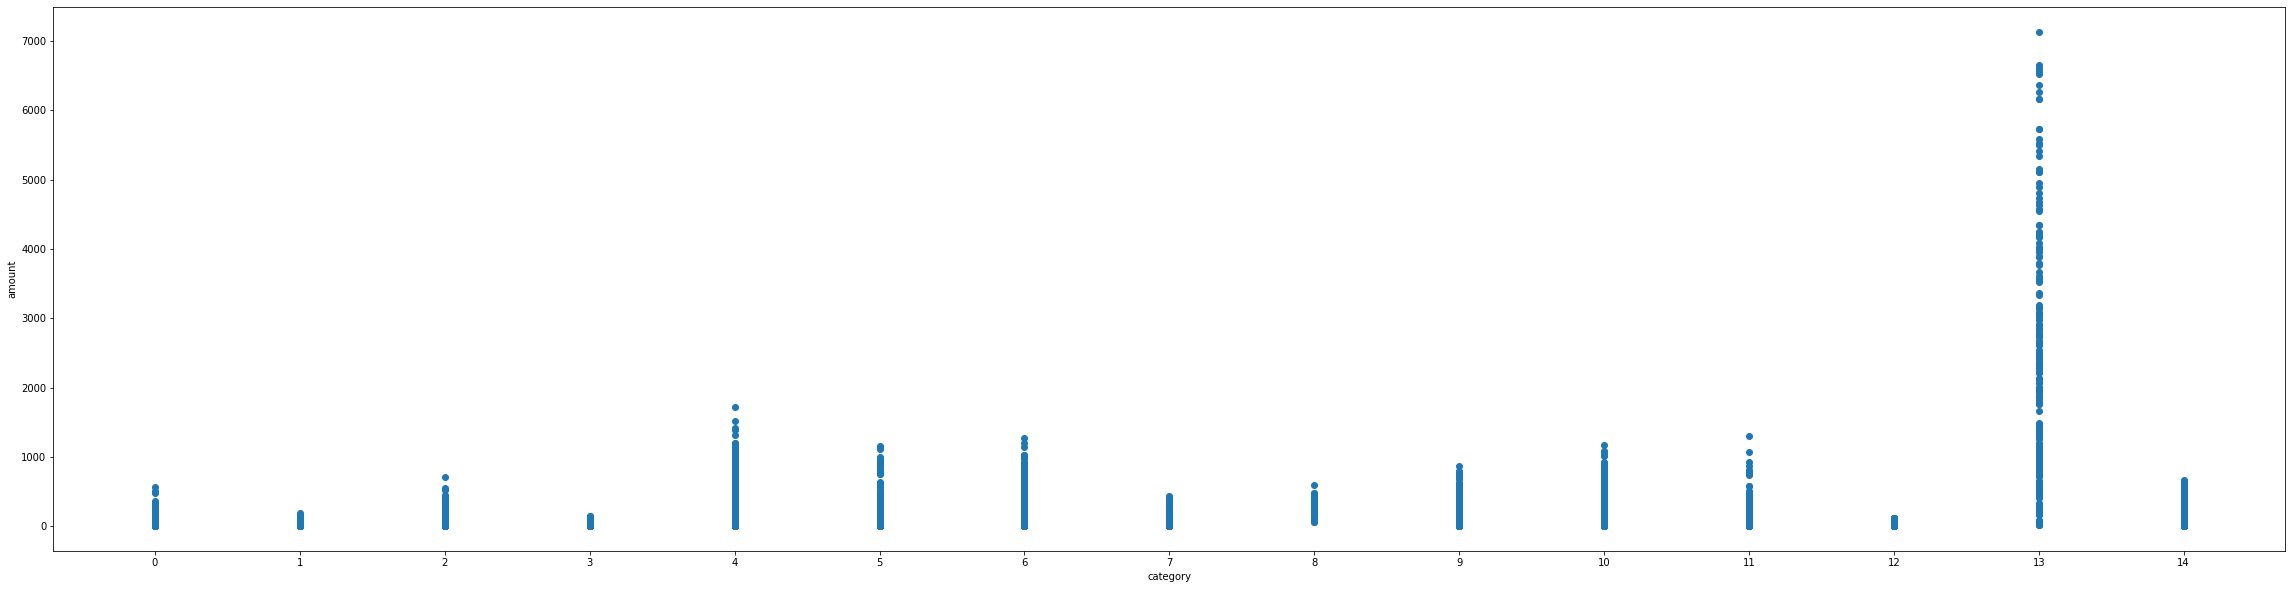

In [18]:
#plot category with amount
plt.figure(figsize=(40,10))
plt.ylabel('amount')
plt.xlabel('category')
plt.scatter(data['category'],data['amount'])
plt.xticks(range(15))
plt.show()

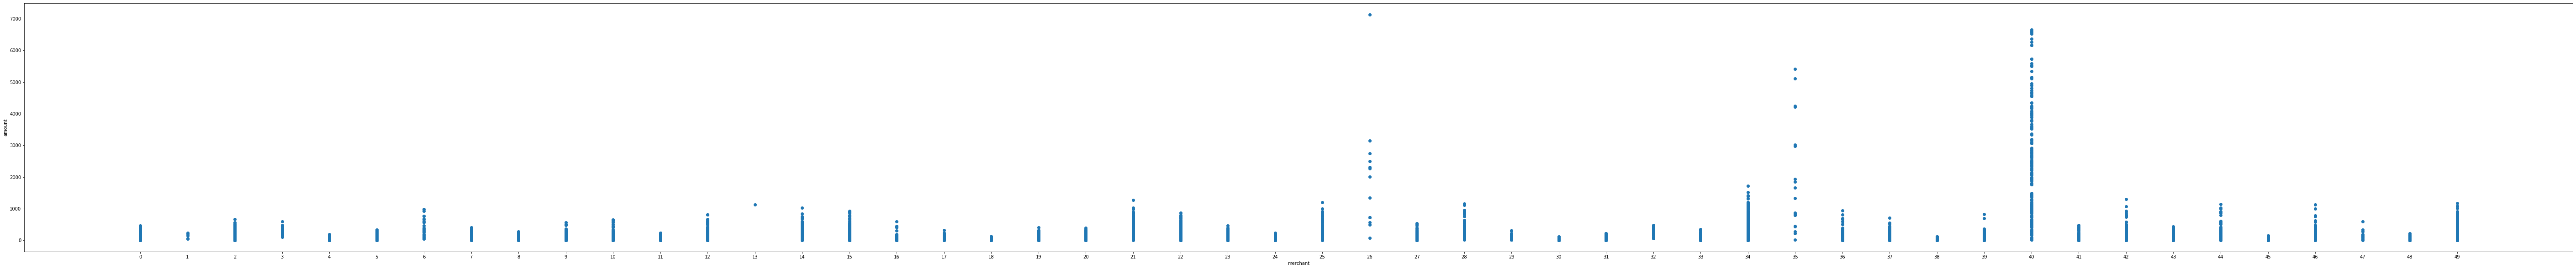

In [19]:
#plot merchant with amount
plt.figure(figsize=(100,10))
plt.ylabel('amount')
plt.xlabel('merchant')
plt.scatter(data['merchant'],data['amount'])
plt.xticks(range(50))
plt.show()

<h1 style="color:#ff8080"> 
PCA
</h1>

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(data)
principalDf = pd.DataFrame(data = principalComponents)

In [21]:
principalDf.head()

,0,1,2,3,4
0,4.820235,-34.639206,6.872564,0.297539,-0.008718
1,-11.298534,-44.719924,7.055177,0.238013,1.992175
2,21.489665,75.408931,4.003994,0.704632,-1.011953
3,1.078732,-51.978068,-4.636882,1.307626,-0.025901
4,-26.152985,11.182613,5.474307,0.376702,-1.012063


<h1 style="color:#ff8080"> 
First model, Isolation Forest
</h1>

In [22]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=800, max_samples=600,contamination=0.01588,behaviour='new')
clf.fit(principalDf)
predict = clf.predict(principalDf)
scores_pred = clf.decision_function(principalDf)

In [23]:
dataIsolation['scores']= scores_pred
dataIsolation['anomaly']= predict
dataIsolation.head()
dataIsolation.loc[dataIsolation['anomaly'] == 1,'anomaly'] = 0
dataIsolation.loc[dataIsolation['anomaly'] == -1,'anomaly'] = 1
# data.value_counts()
dataIsolation['anomaly'].value_counts()

D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\python\pythonIDE\Anaconda\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

0    175560
1      2833
Name: anomaly, dtype: int64

In [24]:
dataIsolation.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,scores,anomaly
173529,60,'C956794113',3,1,'28007',18,'28007',12,42.42,0,0.217349,0
141579,50,'C1991820533',5,2,'28007',18,'28007',12,26.25,0,0.181276,0
560715,170,'C1911281701',2,2,'28007',18,'28007',12,59.65,0,0.180715,0
121655,43,'C798657650',3,2,'28007',30,'28007',12,38.53,0,0.214444,0
326969,106,'C956414645',2,1,'28007',18,'28007',12,11.68,0,0.229746,0


In [25]:
# True positive
from sklearn.metrics import confusion_matrix
# matrix = confusion_matrix(y_test, dataIsolation['anomaly'])
matrix = confusion_matrix(dataIsolation['fraud'], dataIsolation['anomaly'])
print(matrix)

[[174592   1641]
 [   968   1192]]


In [26]:
# Calculate score
from sklearn.metrics import classification_report
# report = classification_report(y_test, dataIsolation['anomaly'])
report = classification_report(dataIsolation['fraud'], dataIsolation['anomaly'])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    176233
           1       0.42      0.55      0.48      2160

   micro avg       0.99      0.99      0.99    178393
   macro avg       0.71      0.77      0.74    178393
weighted avg       0.99      0.99      0.99    178393



<h1 style="color:#ff8080"> 
Second model, Random Cut Forest
</h1>